# 🎬 Analysis of the IMDB Top 1000 Movies

**Author:** Anshuman Mishra and Rajat Tripathi

**Course:** AISSCE-2026

---

### 📌 Objective
This project explores the **IMDB Top 1000 Movies** dataset to uncover interesting trends and patterns. Using Python's **Pandas** library for data manipulation and **Matplotlib** for visualization, we will answer questions about:
*   🎭 Genre popularity and ratings.
*   🔍 The relationship between a movie's rating and its popularity.
*   👨‍💼 The most consistently high-rated directors.

> **Note:** This notebook includes intentional errors for demonstration, followed by their solutions.

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
# Setting a style for more beautiful plots
plt.style.use('seaborn-v0_8') # This is a modern and popular style
%matplotlib inline

# Setting display options for Pandas
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format) # Format decimals

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1. Data Loading and Initial Inspection

First, we load the dataset and perform an initial exploration to understand its structure.

**Intentional Error Introduced:** We will try to load a file with the wrong name to generate a `FileNotFoundError`.

In [2]:
# ERROR CELL: Trying to load with an incorrect filename
print("Attempting to load data...")
df = pd.read_csv('imdb_top_1000_data.csv') # This will cause an error

print("Dataset Preview:")
display(df.head(3))

Attempting to load data...


FileNotFoundError: [Errno 2] No such file or directory: 'imdb_top_1000_data.csv'

### 🐛 Debugging File Load

The cell above failed because the filename was incorrect. The error was:
`FileNotFoundError: File 'imdb_top_1000_data.csv' does not exist`

Let's fix it by using the correct filename and inspect the data.

In [7]:
print("Attempting to load data with the correct filename...")
df = pd.read_csv('imdb_top_1000.csv') # Corrected filename

print("✅ Data loaded successfully!")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

print("Dataset Preview:")
display(df.head(3))

print("\n📊 Column Names and Data Types:")
print(df.info())

Attempting to load data with the correct filename...
✅ Data loaded successfully!
The dataset has 1000 rows and 16 columns.

Dataset Preview:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"



📊 Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


## 2. Data Cleaning

We've identified two issues from the `.info()` output:
1.  The `Gross` column is an `object` (string) because it contains commas.
2.  The `Gross` column has missing (null) values.

**Intentional Error Introduced:** We will try to perform math on the string-based `Gross` column, causing a `TypeError`.

In [8]:
# ERROR CELL: Trying to do math on a string column
print("Attempting to calculate average gross revenue...")
average_gross = df['Gross'].mean() # This will fail because 'Gross' is text, not a number
print(f"The average gross revenue is: ${average_gross:,.2f}")

Attempting to calculate average gross revenue...


TypeError: can only concatenate str (not "int") to str

### 🐛 Debugging Data Types

The cell above failed because you can't calculate the mean of a text field. The error was:
`TypeError: can only concatenate str (not "int") to str` or similar.

Let's fix it by cleaning the `Gross` column, converting it to a numeric type, and handling missing values.

In [9]:
# CORRECTION CELL: Cleaning the Gross column
df_clean = df.copy()

# 1. Clean the 'Gross' column: Remove commas and convert to numeric
print("Cleaning 'Gross' column...")
df_clean['Gross'] = df_clean['Gross'].str.replace(',', '', regex=False)
df_clean['Gross'] = pd.to_numeric(df_clean['Gross'], errors='coerce')

# 2. Handle missing values
missing_gross = df_clean['Gross'].isna().sum()
print(f"Number of missing values in 'Gross' column: {missing_gross}")

# For financial analysis, we will filter out NaNs later. For now, let's see the fix.
print("\n✅ Cleaning complete. New data type for 'Gross':", df_clean['Gross'].dtype)

# Now this should work!
average_gross = df_clean['Gross'].mean()
print(f"\nThe average gross revenue for movies with data is: ${average_gross:,.2f}")

Cleaning 'Gross' column...
Number of missing values in 'Gross' column: 169

✅ Cleaning complete. New data type for 'Gross': float64

The average gross revenue for movies with data is: $68,034,750.87


## 3. Analysis 1: Genre Exploration 🎭

### **Query 1: "For each genre, show me the number of movies, the average IMDB rating, and the average number of votes. Order by the number of movies descending."**

This query involves:
1.  **`SPLIT`** - Breaking apart the `Genre` string for movies with multiple genres.
2.  **`GROUP BY`** - Grouping the data by each individual genre.
3.  **`AGGREGATE`** - Using `COUNT`, `AVG`, and `AVG` functions.
4.  **`ORDER BY`** - Sorting the final result.

**Pandas Analogy:**
```sql
SELECT
    Genre,
    COUNT(Series_Title) AS movie_count,
    AVG(IMDB_Rating) AS avg_imdb_rating,
    AVG(No_of_Votes) AS avg_vote_count
FROM
    (SPLIT the Genre column into multiple rows)
GROUP BY
    Genre
ORDER BY
    movie_count DESC;
```


In [10]:
# WRAP THE QUERY LOGIC IN A FUNCTION
def plot_genre_analysis(n_genres=10):
    """This function executes Query 1 and plots the results. The n_genres parameter is now interactive."""
    
    # --- THIS IS THE EXACT SAME QUERY LOGIC AS BEFORE ---
    genre_expanded = df_clean.assign(genre_split=df_clean['Genre'].str.split(', ')).explode('genre_split')
    query_1_result = genre_expanded.groupby('genre_split').agg(
        movie_count=('Series_Title', 'count'),
        avg_imdb_rating=('IMDB_Rating', 'mean'),
    ).round(2).sort_values('movie_count', ascending=False)
    # --- END OF QUERY LOGIC ---
    
    # Now, we use the n_genres parameter to get the top N
    top_n_genres = query_1_result.head(n_genres)
    
    # Create the visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'QUERY 1 RESULT: Top {n_genres} Genres Analysis', fontsize=16, fontweight='bold')
    
    # Plot A: Top N Genres by Count
    bars1 = ax1.bar(top_n_genres.index, top_n_genres['movie_count'], color='teal', alpha=0.8)
    ax1.set_title('(A) Number of Movies', fontweight='bold')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')
    
    # Plot B: Top N Genres by Avg. Rating (from the top N by count)
    # We need to re-sort this plot by rating
    top_n_by_rating = top_n_genres.sort_values('avg_imdb_rating', ascending=False)
    bars2 = ax2.bar(top_n_by_rating.index, top_n_by_rating['avg_imdb_rating'], color='coral', alpha=0.8)
    ax2.set_title('(B) Average Rating (of top genres by count)', fontweight='bold')
    ax2.set_ylabel('IMDB Rating')
    ax2.tick_params(axis='x', rotation=45)
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Also display the table
    print(f"📋 Top {n_genres} Genres by Number of Movies:")
    display(top_n_genres.style.background_gradient(subset=['movie_count'], cmap='Blues'))

# CREATE THE INTERACTIVE WIDGET
print("Use the slider below to control how many top genres to display:")
interact(plot_genre_analysis, n_genres=widgets.IntSlider(value=10, min=5, max=25, step=1, description='Top N:'));

Use the slider below to control how many top genres to display:


interactive(children=(IntSlider(value=10, description='Top N:', max=25, min=5), Output()), _dom_classes=('widg…

### Interpretation of Genre Analysis

*   **Chart A** shows that **Drama** is by far the most common genre in the top 1000, followed by Comedy and Action. This makes sense, as dramas are often story-driven and critically acclaimed.
*   **Chart B** reveals that while **Film-Noir** and **Biography** have fewer movies in the list, they achieve the highest average ratings. This suggests these genres are particularly well-received by IMDB voters when they are made.

## 4. Analysis 2: Rating vs. Popularity
Is there a relationship between a movie's IMDB rating and its popularity (measured by the number of votes)? Do highly rated movies always have a large audience?

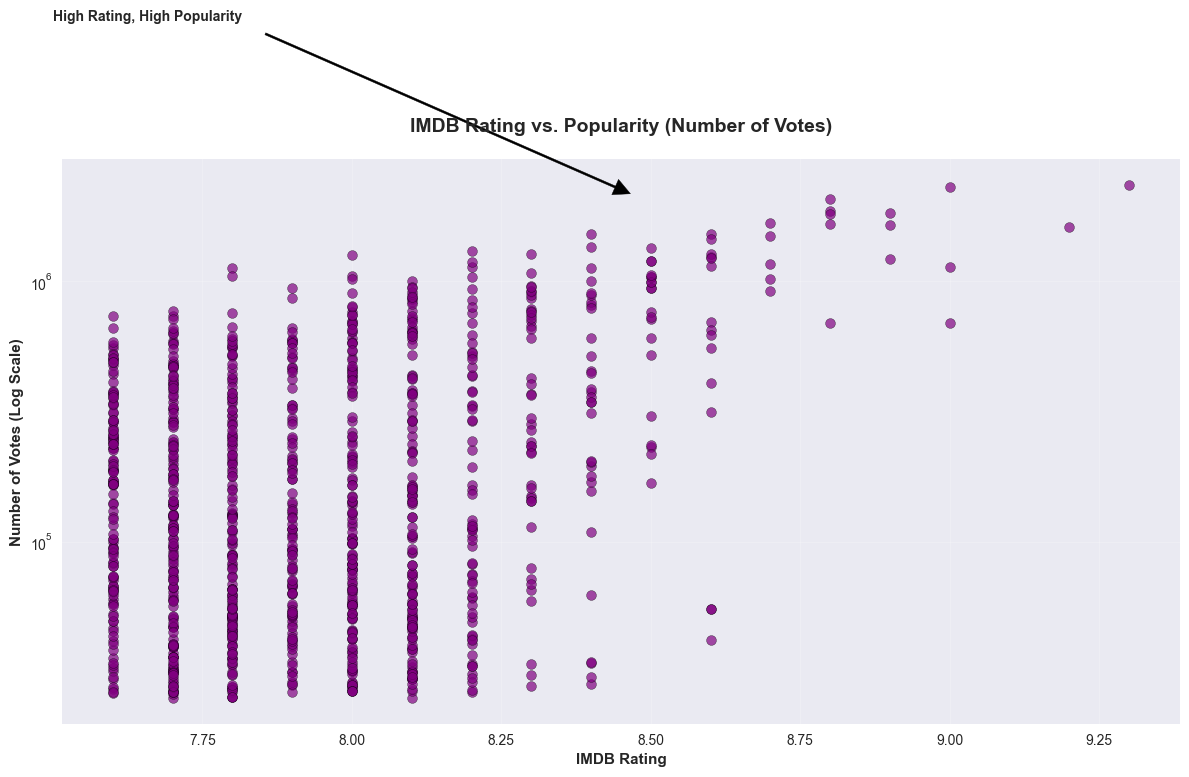

In [11]:
plt.figure(figsize=(12, 8))
# Create the scatter plot with better styling
plt.scatter(df_clean['IMDB_Rating'], df_clean['No_of_Votes'], alpha=0.7, c='purple', edgecolors='black', linewidth=0.3, s=50) # s controls point size

plt.title('IMDB Rating vs. Popularity (Number of Votes)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('IMDB Rating', fontweight='bold')
plt.ylabel('Number of Votes (Log Scale)', fontweight='bold')
plt.grid(True, alpha=0.2)
plt.yscale('log')

# Add a helpful annotation
plt.annotate('High Rating, High Popularity', xy=(8.5, 2e6), xytext=(7.5, 1e7),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretation of Rating vs. Popularity

The scatter plot shows a fascinating trend:
*   There is a **positive correlation**; generally, movies with higher ratings also have more votes. The best movies become popular and are seen by many (cluster in the top-right).
*   However, there are many **hidden gems** (high rating, lower-left quadrant) – excellent movies that have not been seen by a wide audience.
*   Conversely, there are also **popular but divisive** movies (lower-right quadrant) – movies with a large audience but a middling rating.
*   The use of a log scale for the y-axis was necessary to visualize the enormous range in vote counts, from tens of thousands to over two million.

## 5. Analysis 3: Director Spotlight 👨‍💼

### **Query 3: "Find all directors who have directed at least 3 movies in the top 1000. For them, calculate the average IMDB rating of their films, and show me the top 10 highest-rated directors."**

This query involves:
1.  **`GROUP BY`** - Grouping the data by `Director`.
2.  **`HAVING`** - Filtering groups with a `COUNT(*) >= 3`.
3.  **`AGGREGATE`** - Using the `AVG` function.
4.  **`ORDER BY`** & **`LIMIT`** - Getting the top 10 results.

**Pandas Analogy:**
```sql
SELECT
    Director,
    COUNT(Series_Title) AS movie_count,
    AVG(IMDB_Rating) AS avg_rating
FROM
    imdb_top_1000_movies
GROUP BY
    Director
HAVING
    COUNT(Series_Title) >= 3
ORDER BY
    avg_rating DESC
LIMIT 10;
```

In [12]:
# WRAP THE QUERY LOGIC IN A FUNCTION
def plot_director_analysis(min_movies=3, n_directors=10):
    """This function executes Query 3 and plots the results. The parameters are now interactive."""
    
    # --- THIS IS THE EXACT SAME QUERY LOGIC AS BEFORE ---
    director_stats = df_clean.groupby('Director').agg(
        movie_count=('Series_Title', 'count'),
        avg_rating=('IMDB_Rating', 'mean')
    ).round(2)
    prolific_directors = director_stats[director_stats['movie_count'] >= min_movies]
    query_3_result = prolific_directors.nlargest(n_directors, 'avg_rating')
    # --- END OF QUERY LOGIC ---
    
    # Create the visualization
    plt.figure(figsize=(12, 6))
    bars = plt.bar(query_3_result.index, query_3_result['avg_rating'], color='orange', alpha=0.8)
    
    plt.title(f'QUERY 3 RESULT: Top {n_directors} Directors (Min. {min_movies} Films)', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Director', fontweight='bold')
    plt.ylabel('Average IMDB Rating', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(7.5, 9.0) # Adjusted ylim for better scale

    # Add value labels on bars
    for bar, rating in zip(bars, query_3_result['avg_rating']):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                 f'{rating:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Also display the table
    print(f"📋 Top {n_directors} Directors with at least {min_movies} movies:")
    display(query_3_result.style.background_gradient(subset=['avg_rating'], cmap='viridis'))

# CREATE THE INTERACTIVE WIDGETS
print("Use the controls below to filter directors:")
interact(plot_director_analysis,
         min_movies=widgets.IntSlider(value=3, min=2, max=10, step=1, description='Min Films:'),
         n_directors=widgets.IntSlider(value=10, min=5, max=20, step=1, description='Top N:'));

Use the controls below to filter directors:


interactive(children=(IntSlider(value=3, description='Min Films:', max=10, min=2), IntSlider(value=10, descrip…

### Interpretation of Director Analysis

This analysis highlights directors who are not only great but also consistently so. To feature here, a director needed at least 3 films in the Top 1000.

*   Directors like **Alfred Hitchcock** and **Stanley Kubrick** are legends for a reason, appearing high on this list with many films.
*   The presence of directors like **Christopher Nolan** and **Satyajit Ray** shows that excellence spans different eras and film industries.
*   The average ratings are all remarkably high (above 8.0), showing the incredible caliber of these filmmakers.

## 6. Conclusion

This analysis of the IMDB Top 1000 dataset revealed several key insights:
1.  **Drama Dominance:** Drama is the most prevalent genre, but genres like Film-Noir and Biography receive the highest average scores.
2.  **Quality & Popularity:** While high-quality films (high ratings) tend to be popular (high votes), there are many excellent, less-seen films waiting to be discovered.
3.  **Directorial Consistency:** A group of highly skilled directors, including Hitchcock, Kubrick, and Nolan, have repeatedly produced films that resonate deeply with IMDB's audience.

This project demonstrates the power of Python's Pandas library for data manipulation and Matplotlib for creating insightful visualizations to explore and communicate trends within a complex dataset.